<h1 style="color:cornflowerblue">Webscraping for Data Science</h1>

In [1]:
# Importing Libraries

# Scrappng
from bs4 import BeautifulSoup

# Data Manipulation
import pandas as pd

# Other Libraies
import re
import requests

In [7]:
# Target URL
url = "https://www.glassdoor.com.br/Salários/brasil-cientista-de-dados-salário-SRCH_IL.0,6_IN36_KO7,25.htm"

In [16]:
# Requisition
req = requests.get(url , headers={"User-Agent": "Opera"})

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<title>Security | Glassdoor</title>\n\t\t<meta http-equiv="content-type" content="text/html;charset=utf-8" />\n\t\t<meta name=\'viewport\' content=\'width=device-width, initial-scale=1\'/>\n\t\t<meta name="theme-color" content="#0caa41">\n\t\t<style type="text/css">body,html{background:#fff;font-family:Helvetica Neue,HelveticaNeue,Helvetica,Arial,sans-serif;font-size:16px;margin:0;padding:0}div,h1,h2,h3,h4,h5,h6,p{color:#20262e}.header{-webkit-box-shadow:inset 0 -1px 0 0 #dee0e3;box-shadow:inset 0 -1px 0 0 #dee0e3}.header .center{height:45px}.header .center:before{content:"";height:100%;margin-right:-.25em}.header .center:before,.logo{display:inline-block;vertical-align:middle}.center{margin:0 auto;width:996px}.article,.center{box-sizing:border-box}.article{background-color:#fff;border-radius:3px;box-shadow:0 0 2px #c4c7cc;height:100%;margin:16px 0;max-width:690px;padding:16px}h1{font-size:20px;font-weight:900;line-height:1em;margin-top:0}h2{font
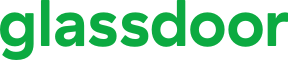

In [17]:
page = req.text

page

<!DOCTYPE html>

<html>
<head>
<title>Security | Glassdoor</title>
<meta content="text/html;charset=utf-8" http-equiv="content-type"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="#0caa41" name="theme-color"/>
<style type="text/css">body,html{background:#fff;font-family:Helvetica Neue,HelveticaNeue,Helvetica,Arial,sans-serif;font-size:16px;margin:0;padding:0}div,h1,h2,h3,h4,h5,h6,p{color:#20262e}.header{-webkit-box-shadow:inset 0 -1px 0 0 #dee0e3;box-shadow:inset 0 -1px 0 0 #dee0e3}.header .center{height:45px}.header .center:before{content:"";height:100%;margin-right:-.25em}.header .center:before,.logo{display:inline-block;vertical-align:middle}.center{margin:0 auto;width:996px}.article,.center{box-sizing:border-box}.article{background-color:#fff;border-radius:3px;box-shadow:0 0 2px #c4c7cc;height:100%;margin:16px 0;max-width:690px;padding:16px}h1{font-size:20px;font-weight:900;line-height:1em;margin-top:0}h2{font-size:18px;font-weight:400;margin
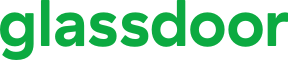

In [18]:
soup = BeautifulSoup(page, 'html.parser')
soup

<h1 style="color:cornflowerblue">Extracting </h1>
<p>HTML for company name and salary:
    <ul type="disc">
    <li>Company:
        <ul type="circle">
        <li>h3 class="m-0 css-16zrpia el6ke054" data-test="salaries-list-item-0-employer-name"
        <li>a href="LINK REMOVED" class="css-pmokl e1aj7ssy3"
        </ul>
    <li>Salary:
        <ul type="circle">
        <li>div class="d-flex align-items-baseline" data-test="salaries-list-item-0-salary-info"
        <li>h3 class="m-0 css-16zrpia el6ke054"
        </ul>
    </ul></p>
<p>For both, the element "item-0" can be replaced with a different number for other companies.

In [5]:
# Extracting Companies Names
tags_h3 = soup.find_all("h3", {"data-test": re.compile(r"salaries-list-item.*employer-name")})
tags_h3

[]

In [6]:
tags_h3[0]


IndexError: list index out of range

In [ ]:
len(tags_h3)

In [ ]:
# Extracting Companies Names
tags_div = soup.find_all("div", {"data-test": re.compile(r"salaries-list-item-.*-salary-info")})
tags_div

In [ ]:
tags_div[0]

In [ ]:
len(tags_div)

In [ ]:
# Names and Salary
comp_salary = []

for company, salary in zip(tags_h3, tags_div):
    company = company.find("a").text
    salary = salary.contents[0].text.replace("R$\xa0", "").replace(".", "")
    comp_salary.append((company, salary))

print(comp_salary)

In [ ]:
salary_df = pd.DataFrame(comp_salary, columns=["Company", "Salary"])
salary_df.head()

In [ ]:
salary_df.dtypes

In [ ]:
salary_df["Salary"] = salary_df["Salary"].astype(float)
salary_df

In [ ]:
salary_df.describe()

In [ ]:
def search_salary_glassdoor(page_url):
    url = page_url
    req = requests.get(url, headres={"User-Agent": "Mozilla/5.0"})

    page = req.text

    soup = BeautifulSoup(page, "html.parser")

    tags_h3 = soup.find_all("h3", {"data-test": re.compile(r"salaries-list-item.*employer-name")})
    tags_div = soup.find_all("div", {"data-test": re.compile(r"salaries-list-item-.*-salary-info")})

    comp_salary = []

    for company, salary in zip(tags_h3, tags_div):
        company = company.find("a").text
        salary = salary.contents[0].text.replace("R$\xa0", "").replace(".", "")
        comp_salary.append((company, salary))

    salary_df = pd.DataFrame(comp_salary, columns=["Company", "Salary"])
    salary_df["Salary"] = salary_df["Salary"].astype(float)

    return salary_df
